# Chapter 6. AI 기초 - Clustering
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/
----
* Clustering(군집화)는 소속집단의 정보가 없고 모르는 상태에서 비슷한 집단으로 묶는 비지도 학습
* 입력 데이터를 바탕으로 출력값을 예측하는 목적으로 사용되기 보다 데이터에서 의미를 파악하고 기준을 만드는 목적으로 사용

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. K-Means

## Data

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, Y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  shuffle=True,
                  random_state=1)

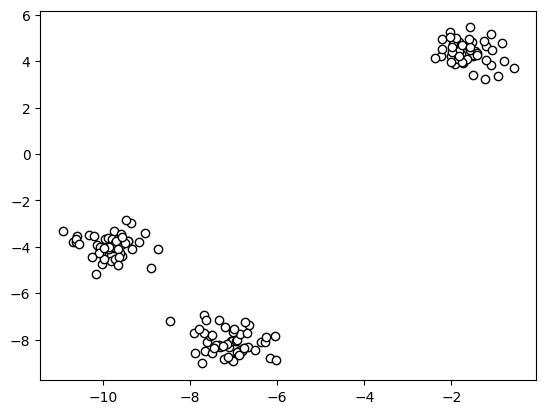

In [4]:
plt.figure()

plt.scatter(X[:,0], X[:,1], c='white', edgecolors='black')

plt.show()

## Modeling

In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(n_clusters=3,
            init='random',
            n_init=10,
            max_iter=300,
            random_state=0)
km.fit(X)

KMeans(init='random', n_clusters=3, n_init=10, random_state=0)

## Result

In [7]:
pred = km.predict(X)

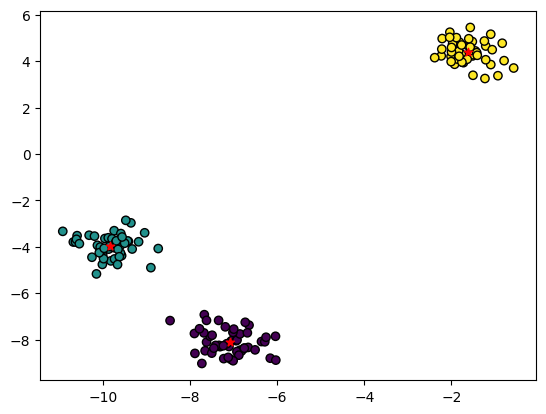

In [8]:
plt.figure()

plt.scatter(X[:,0],X[:,1],c=pred,edgecolors='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r',marker='*')

plt.show()

# 2. Silhouette Coefficient
* 0 ~ 1 사이의 값

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [11]:
s_sample = silhouette_samples(X,pred,metric='euclidean')
s_score = silhouette_score(X,pred,metric='euclidean')

In [12]:
print(X.shape, s_sample.shape)

(150, 2) (150,)


In [13]:
s_score

0.8603266510756534

In [14]:
np.unique(pred)

array([0, 1, 2])

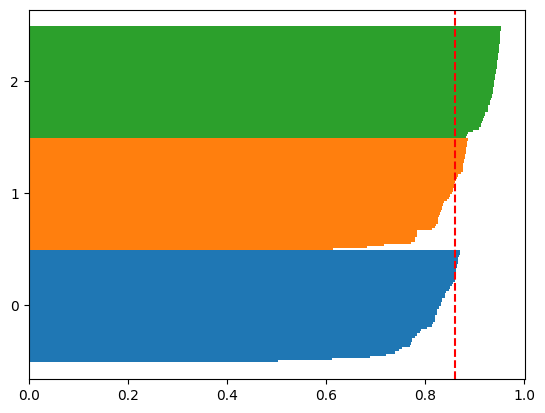

In [15]:
plt.figure()

low=0
high=0
ticks=[]
label = np.unique(pred)

for i in label :
    val = s_sample[pred==i]
    val.sort()
    high+=len(val)
    plt.barh(range(low,high),val,height=1,edgecolor='none')
    ticks.append((low+high)/2)
    low=high
    
plt.axvline(s_score,color='r',linestyle='--')
plt.yticks(ticks,label)
plt.show()

## Ex) K = 2

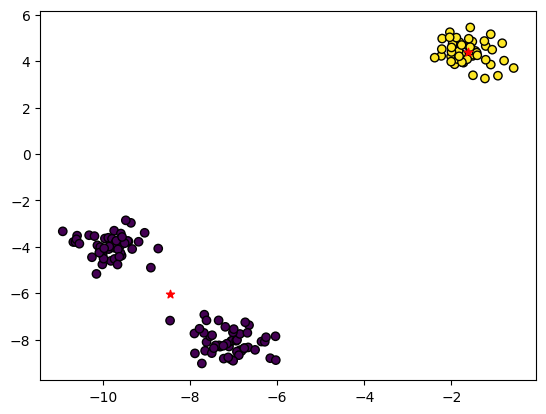

0.8234144595094701


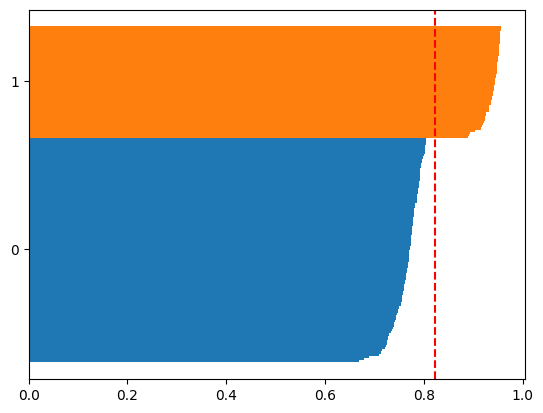

In [16]:
# 모델 생성
km = KMeans(n_clusters=2,
            init='random',
            n_init=10,
            max_iter=300,
            random_state=0)
km.fit(X)
pred=km.predict(X)

# 군집화 시각화
plt.figure()

plt.scatter(X[:,0],X[:,1],c=pred,edgecolors='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r',marker='*')

plt.show()

# 성능 평가
vals = silhouette_samples(X,pred,metric='euclidean')
s_score = silhouette_score(X,pred,metric='euclidean')
print(s_score)

label = np.unique(pred)

plt.figure()

low=0
high=0
ticks = []

for i in label :
    ivals = vals[pred==i]
    ivals.sort()
    high+=len(ivals)
    plt.barh(range(low,high),ivals,height=1,edgecolor='none')
    ticks.append((low+high)/2)
    low=high
    
plt.axvline(s_score, color='r',linestyle='--')
plt.yticks(ticks, label)
plt.show()

## Ex) K = 4

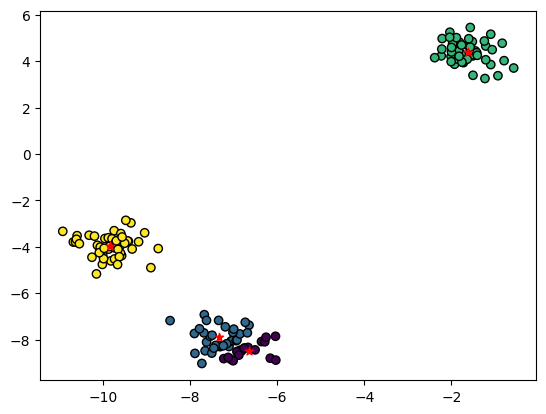

0.6898474851937526


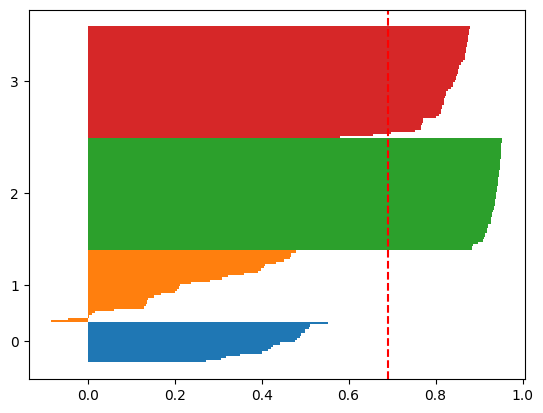

In [17]:
# 모델 생성
km = KMeans(n_clusters=4,
            init='random',
            n_init=1,
            max_iter=300,
            random_state=0)
km.fit(X)
pred=km.predict(X)

# 군집화 시각화
plt.figure()

plt.scatter(X[:,0],X[:,1],c=pred,edgecolors='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='r',marker='*')

plt.show()

# 성능 평가
vals = silhouette_samples(X,pred,metric='euclidean')
s_score = silhouette_score(X,pred,metric='euclidean')
print(s_score)

label = np.unique(pred)

plt.figure()

low=0
high=0
ticks = []

for i in label :
    ivals = vals[pred==i]
    ivals.sort()
    high+=len(ivals)
    plt.barh(range(low,high),ivals,height=1,edgecolor='none')
    ticks.append((low+high)/2)
    low=high
    
plt.axvline(s_score, color='r',linestyle='--')
plt.yticks(ticks, label)
plt.show()

# 3. DBSCAN
* moons, circle 데이터와 같은 비선형 데이터의 Clustering을 해결
* 군집이 몇개인지 아예 모를 때 더 효과적
* DBSCAN은 현재 데이터만 분류 : fit_predict()

## Data

In [18]:
from sklearn.datasets import make_moons

In [19]:
X, Y = make_moons(n_samples=100,
                  noise=0.1,
                  random_state=1)

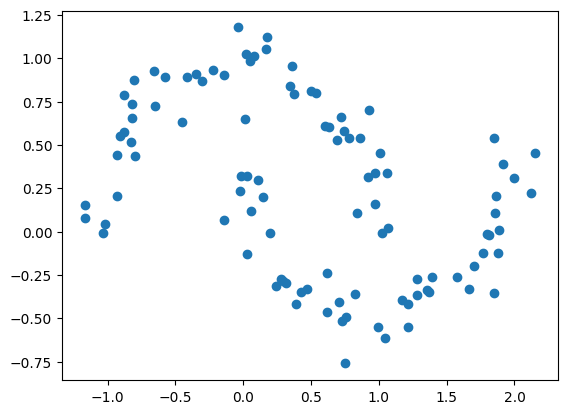

In [20]:
plt.figure()

plt.scatter(X[:,0],X[:,1])

plt.show()

## Modeling

In [21]:
from sklearn.cluster import DBSCAN

In [22]:
db=DBSCAN(eps=0.3,
          min_samples=5,
          metric='euclidean')
pred=db.fit_predict(X)

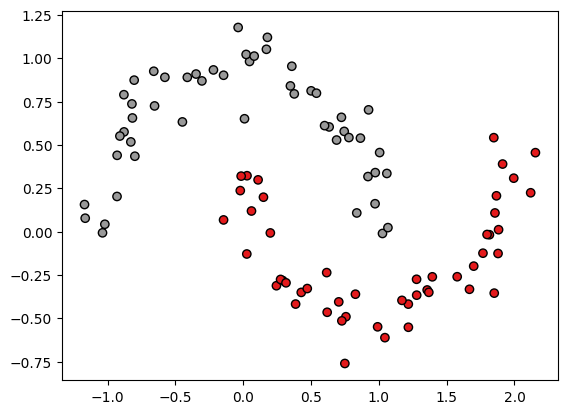

In [23]:
plt.figure()

plt.scatter(X[:,0],X[:,1],c=pred,edgecolors='black',cmap='Set1')

plt.show()

# 4. OneClassSVM

## Data

In [24]:
X = np.random.randn(100,2)
X = np.r_[X+4,X-4]

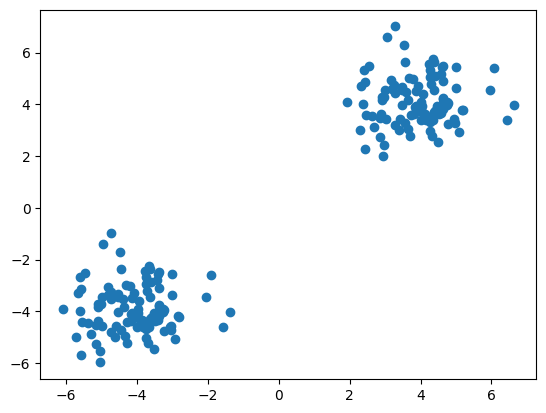

In [25]:
plt.figure()

plt.scatter(X[:,0],X[:,1])

plt.show()

## Modeling

In [26]:
from sklearn.svm import OneClassSVM

In [27]:
ocsvm = OneClassSVM(gamma=0.1,
                    nu=0.1,
                    kernel='rbf')
ocsvm.fit(X)

OneClassSVM(gamma=0.1, nu=0.1)

## Result

In [28]:
def plot_ocsvm_regions(X, classifier, resolution=0.02):
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

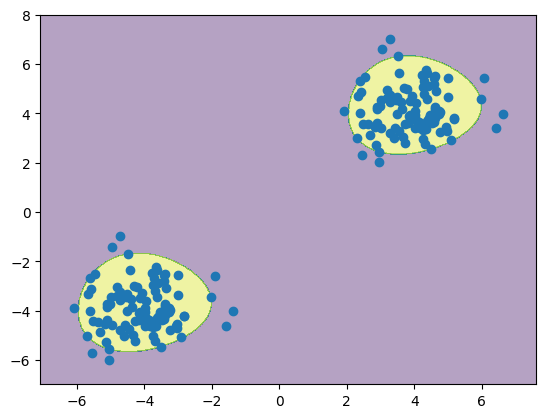

In [29]:
plot_ocsvm_regions(X, ocsvm)

plt.scatter(X[:,0],X[:,1])

plt.show()

In [32]:
def plot_ocsvm_regions_subplot(X, classifier, resolution=0.02, ax=axes):
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4)
    ax.set_xlim(xx1.min(), xx1.max())
    ax.set_ylim(xx2.min(), xx2.max())

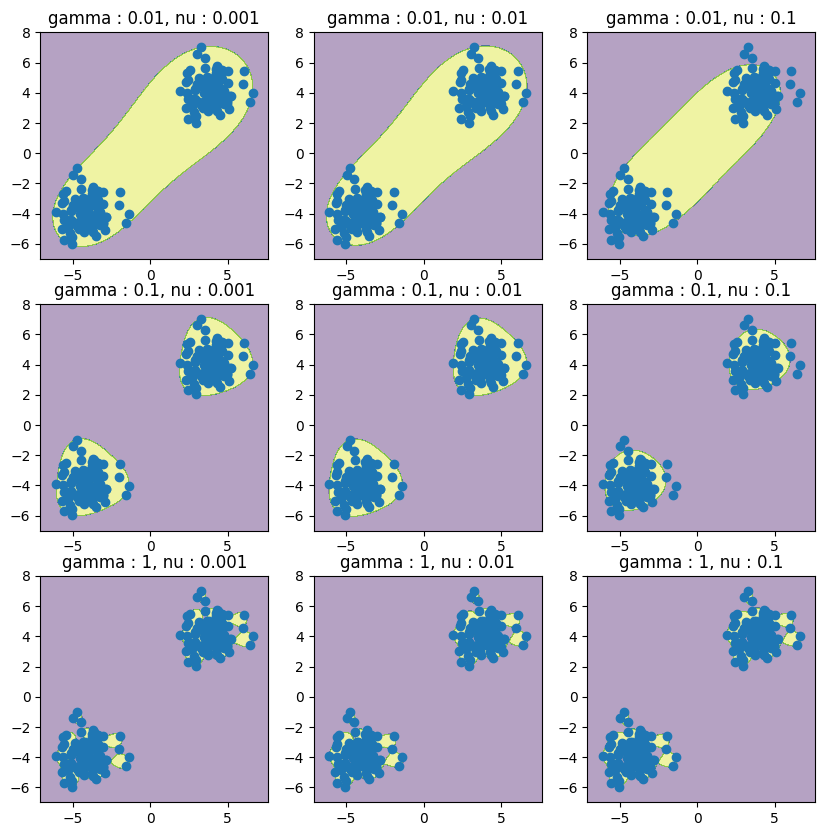

In [33]:
fig, axes = plt.subplots(3,3, figsize = (10,10))

for i, gamma in enumerate([0.01,0.1,1]) :
    for j, nu in enumerate([0.001,0.01,0.1]) :
        ocsvm = OneClassSVM(gamma= gamma,
                            nu= nu,
                            kernel= 'rbf')
        ocsvm.fit(X)
        
        plot_ocsvm_regions_subplot(X,ocsvm,ax= axes[i][j])
        axes[i][j].scatter(X[:,0],X[:,1])
        axes[i][j].set_title('gamma : {}, nu : {}'.format(gamma,nu))
        
plt.show()

* gamma는 과대적합을 조장할 수 있다.
* nuㄴ는 원래 데이터에서 이상치가 얼마나 존재한다고 볼 것인지를 의미